## Model Notebook

This is the notebook for model in age and gender detector. Here, we will extract the data, train it and fit it into our model and will evaluate our result and optimize the model for better result.

#### Import the Necessary Libraries

In [3]:

import tensorflow as tf
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  

# Importing various layers and functions from TensorFlow Keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D  
from tensorflow.keras.models import Model  
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop




#### Extract Data From The Dataset

If the dataset has not been downloaded yet, download it from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [4]:
fldr= "./UTkFace"

In [5]:
import os
files= os.listdir(fldr)

#### Creating list of images from the dataset

In [6]:
# Initialize empty lists to store ages, genders, and images
ages = []
genders = []
images = []

# Loop over each file in the list of files
for fle in files:
    # Extract age from the filename (assumes age is the first part before the first underscore)
    age = int(fle.split("_")[0])
    # Extract gender from the filename (assumes gender is the second part before the second underscore)
    gender = int(fle.split("_")[1])
    
    # Create the full path to the image file by combining the folder path and file name
    total = fldr + "/" + fle
    # Print the full path to the image file (for debugging purposes)
    print(total)
    
    # Read the image file from the specified path
    image = cv2.imread(total)

    # Convert the image from BGR color space (default in OpenCV) to RGB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image to 48x48 pixels
    image = cv2.resize(image, (48, 48))
    
    # Append the processed image to the images list
    images.append(image)


./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

#### Creating list of age and gender from the dataset

In [7]:
# Loop over each file in the list of files
for fle in files:
    # Extract age from the filename (assumes age is the first part before the first underscore)
    age = int(fle.split("_")[0])
    # Extract gender from the filename (assumes gender is the second part before the second underscore)
    gender = int(fle.split("_")[1])

    ages.append(age)  # Append the extracted age to the ages list
    genders.append(gender)  # Append the extracted gender to the genders list


#### Viewing a sample

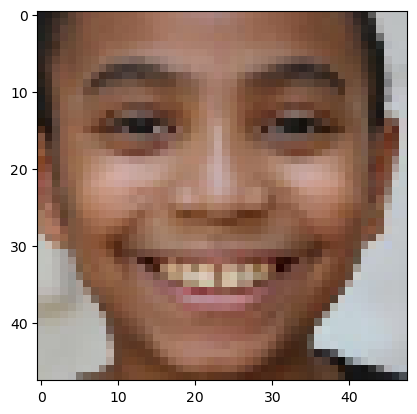

In [8]:
plt.imshow(images[87])

In [64]:
print(ages[87])

10


In [10]:
print(genders[87])

0


#### saving images array, ages aray and genders array in the system

In [11]:
images_f=np.array(images)
ages_f= np.array(ages)
genders_f= np.array(genders)

In [12]:
np.save(fldr+"image.npy", images_f)  # Save the processed images array to a .npy file in the specified folder
np.save(fldr+"ages.npy", ages_f)  # Save the ages array to a .npy file in the specified folder
np.save(fldr+"genders.npy", genders_f)  # Save the genders array to a .npy file in the specified folder



#### Finding the no. of Male and Female samples respectively

In [13]:
# Calculate the unique values in the genders_f array and their respective counts
values, counts = np.unique(genders_f, return_counts=True)
# Print the counts of each unique value in the genders_f array
print(counts)


[12391 11317]


#### Plotting the no. of male and female samples

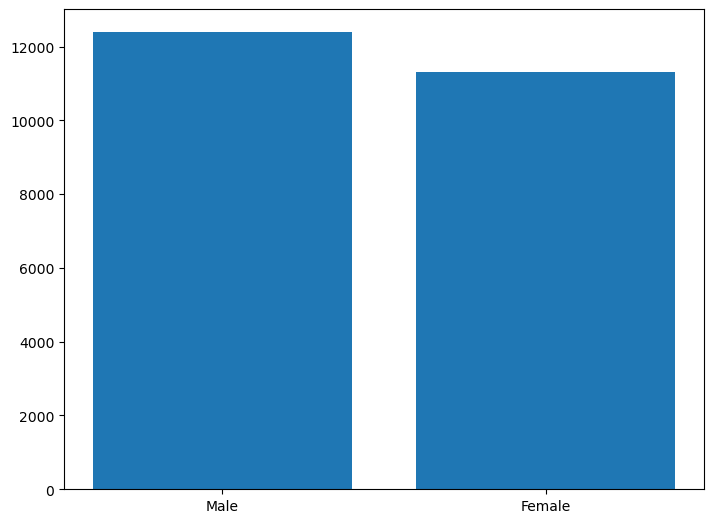

In [14]:
# Create a new figure for plotting
fig = plt.figure()
# Add a set of axes to the figure
ax = fig.add_axes([0,0,1,1])

# Define the categories for the bar chart
gender = ["Male", "Female"]
# Define the corresponding values for each category
values = [12391, 11317]

# Create a bar chart with genders on the x-axis and their respective values on the y-axis
ax.bar(gender, values)

# Display the plot
plt.show()


#### Finding the no. of samples for each age

In [15]:
# Calculate the unique values in the ages_f array and their respective counts
values, counts = np.unique(ages_f, return_counts=True)
# Print the counts of each unique value in the ages_f array
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


#### Converting age counts to list

In [16]:
val= values.tolist()
cnt= counts.tolist()

#### Plotting the samples age-wise

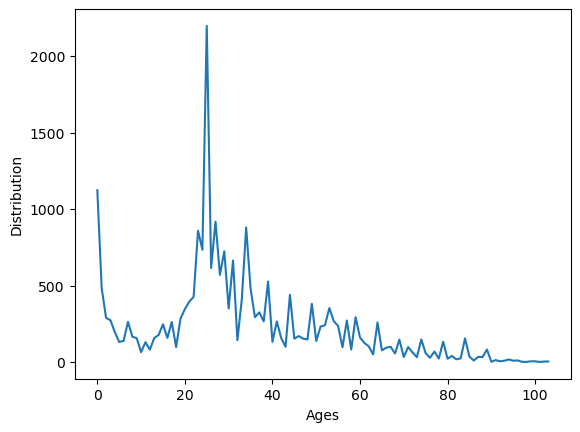

In [17]:
plt.plot(counts)
plt.xlabel("Ages")
plt.ylabel("Distribution")
plt.show()

#### Defining Labels for Output

In [18]:
labels = []  # Initialize an empty list to store labels

i = 0  # Initialize a counter variable
while i < len(ages):  # Iterate over each element of the 'ages' list
    label = []  # Initialize an empty list to store a label
    label.append(ages[i])  # Append the age value at index 'i' to the label list
    label.append(genders[i])  # Append the gender value at index 'i' to the label list
    labels.append(label)  # Append the label list to the 'labels' list
    i += 1  # Increment the counter variable to move to the next element



#### Creating another list of labels from existing one
##### For better learning

In [19]:
images_f_2 = images_f / 255  # Normalize pixel values of the images to the range [0, 1]

In [20]:
images_f_2.shape

(23708, 48, 48, 3)

In [21]:
labels_f = np.array(labels)  # Convert the list of lists 'labels' into a NumPy array 'labels_f'

In [22]:
from sklearn.model_selection import train_test_split

#### Splitting the model into train and test

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)


In [24]:
Y_train[0:5]

array([[28,  0],
       [67,  0],
       [20,  1],
       [26,  0],
       [20,  1]])

#### Splitting "Y_train" and "Y_test" further
##### For better understanding

In [25]:
Y_train_2= [Y_train[:,1],Y_train[:,0]]
Y_test_2= [Y_test[:,1],Y_test[:,0]]

In [26]:
Y_train_2[0][0:5]

array([0, 0, 1, 0, 1])

In [27]:
Y_train_2[1][0:5]

array([28, 67, 20, 26, 20])

#### Defining the Model

In [28]:
# Define a function named convolution which takes input_tensor and filters as arguments
def convolution(input_tensor, filters):
    # Apply 2D convolutional layer with specified parameters
    x = Conv2D(filters=filters, kernel_size=(3,3), padding="same", strides=(1,1), kernel_regularizer=l2(0.001))(input_tensor)
    # Apply dropout with a rate of 0.1
    x = Dropout(0.1)(x)
    # Apply ReLU activation function
    x = Activation("relu")(x)
    return x


In [29]:
# Define a function named model which takes input_shape as an argument
def model(input_shape):
    # Define input layer
    inputs= Input((input_shape))
    # First convolutional block
    conv_1= convolution(inputs,32)
    maxp_1= MaxPooling2D(pool_size=(2,2))(conv_1)
    # Second convolutional block
    conv_2= convolution(maxp_1,64)
    maxp_2= MaxPooling2D(pool_size=(2,2))(conv_2)
    # Third convolutional block
    conv_3= convolution(maxp_2,128)
    maxp_3= MaxPooling2D(pool_size=(2,2))(conv_3)
    # Fourth convolutional block
    conv_4= convolution(maxp_3,256)
    maxp_4= MaxPooling2D(pool_size=(2,2))(conv_4)
    # Flatten layer
    flatten= Flatten()(maxp_4)
    # First dense layer
    dense_1= Dense(64,activation="relu")(flatten)
    # Second dense layer
    dense_2= Dense(64,activation="relu")(flatten)
    # Apply dropout to the first dense layer
    drop_1= Dropout(0.2)(dense_1)
    # Apply dropout to the second dense layer
    drop_2= Dropout(0.2)(dense_2)
    # Output layer for binary classification
    output_1= Dense(1, activation="sigmoid", name="sex_out")(drop_1)
    # Output layer for regression
    output_2= Dense(1, activation="relu", name="age_out")(drop_2)
    # Define the model with inputs and outputs
    model= Model(inputs=[inputs], outputs=[output_1, output_2])
    # Compile the model with binary crossentropy and mean absolute error losses, Adam optimizer, and accuracy metric
    model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",metrics=["accuracy","mae"])
    # Return the compiled model
    return model






In [30]:
Model= model((48,48,3))

In [31]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

#### Initializing the Model

In [33]:
# Define the filename to save the model weights with the correct extension
fle_s = "Age_Sex_Detection.keras"

# Define a ModelCheckpoint callback to save the model weights
checkpoint = ModelCheckpoint(
    fle_s,  # Filename to save the model weights
    monitor="val_loss",  # Quantity to monitor for saving the best model
    verbose=1,  # Verbosity mode, 1 for progress bar
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the entire model (including architecture)
    mode="auto",  # Auto mode for determining best model
    save_freq="epoch"  # Frequency of saving weights (every epoch)
)

# Define an EarlyStopping callback to stop training when a monitored quantity has stopped improving
Early_stop = tf.keras.callbacks.EarlyStopping(
    patience=75,  # Number of epochs with no improvement after which training will be stopped
    monitor="val_loss",  # Quantity to be monitored for early stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# List of callbacks to be used during training
callback_list = [checkpoint, Early_stop]



#### Running the Model
##### This will take some time

In [34]:


# Train the model using the fit method
History = Model.fit(
    X_train,  # Training data
    Y_train_2,  # Target data (age labels)
    batch_size=64,  # Number of samples per gradient update
    validation_data=(X_test, Y_test_2),  # Data on which to evaluate the loss and any model metrics at the end of each epoch
    epochs=250,  # Number of epochs to train the model
    callbacks=callback_list  # List of callbacks to apply during training
)



Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - age_out_mae: 17.5611 - loss: 18.4741 - sex_out_accuracy: 0.5189
Epoch 1: val_loss improved from inf to 15.99858, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 39s 118ms/step - age_out_mae: 17.5551 - loss: 18.4681 - sex_out_accuracy: 0.5190 - val_age_out_mae: 15.1347 - val_loss: 15.9986 - val_sex_out_accuracy: 0.5289
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - age_out_mae: 14.0320 - loss: 14.9123 - sex_out_accuracy: 0.5183
Epoch 2: val_loss improved from 15.99858 to 12.88805, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 33s 118ms/step - age_out_mae: 14.0292 - loss: 14.9095 - sex_out_accuracy: 0.5184 - val_age_out_mae: 12.0206 - val_loss: 12.8880 - val_sex_out_accuracy: 0.7022
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - age_out_mae: 10.7235 - loss: 11.5926 - sex_out_accuracy: 0.6609
Epoch 3: val_loss did not improve from 12.88805
278/278 ━━━━━━━━━━━━━━━━━━━━ 3

#### Model Evaluation

In [36]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - age_out_mae: 6.4484 - loss: 7.3923 - sex_out_accuracy: 0.8835


[7.363638401031494, 6.420731067657471, 0.8832461833953857]

In [38]:
pred= Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


In [39]:
pred[1]

array([[47.04398 ],
       [33.996616],
       [ 5.350956],
       ...,
       [53.24081 ],
       [32.58223 ],
       [37.701206]], dtype=float32)

#### Plotting Loss

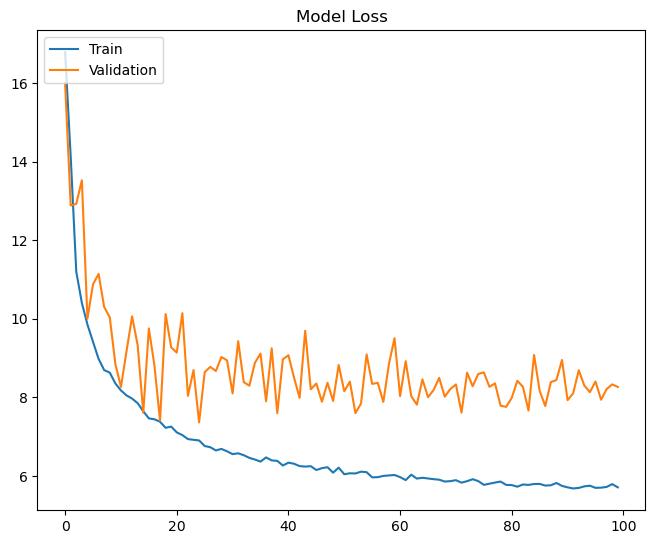

In [40]:
plt.plot(History.history["loss"])  # Plot the training loss over epochs
plt.plot(History.history["val_loss"])  # Plot the validation loss over epochs
plt.title("Model Loss")  # Set the title of the plot
plt.xlabel = ("Epoch")  # Set the label for the x-axis
plt.ylabel = ("Loss")  # Set the label for the y-axis
plt.legend(["Train", "Validation"], loc="upper left")  # Add a legend to differentiate between training and validation loss
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)  # Adjust the subplot parameters to give some padding
         

#### Plotting Sex Accuracy

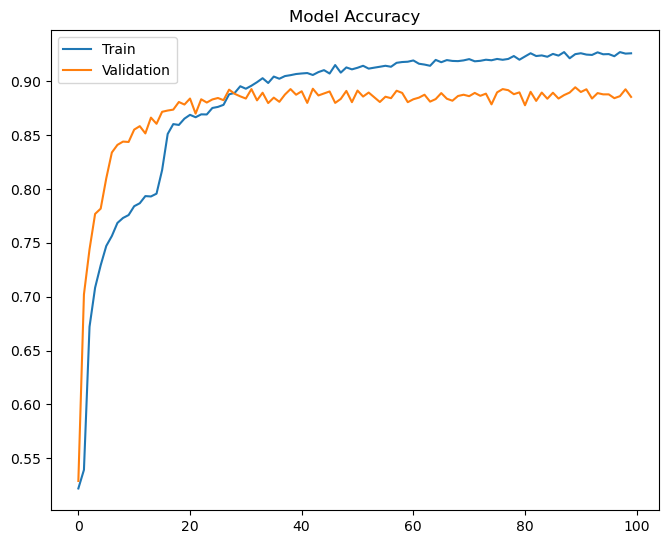

In [41]:
plt.plot(History.history["sex_out_accuracy"])
plt.plot(History.history["val_sex_out_accuracy"])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=("Accuracy")
plt.legend(["Train","Validation"], loc="upper left")
plt.subplots_adjust(top=1.0, bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

#### Plotting sex Accuracy

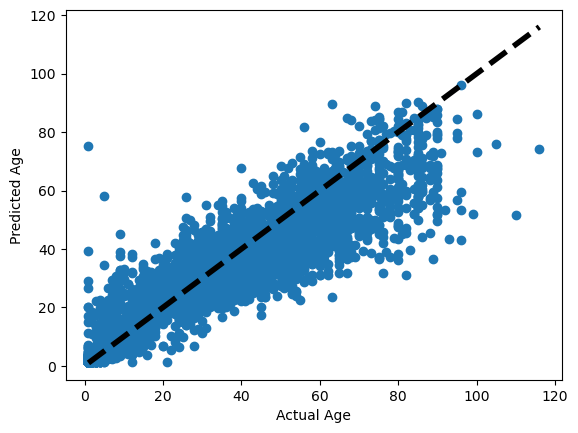

In [42]:
fig, ax = plt.subplots()  # Create a figure and an axes
ax.scatter(Y_test_2[1], pred[1])  # Create a scatter plot of the actual vs predicted values
ax.plot([Y_test_2[1].min(), Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], "k--", lw=4)  # Plot a diagonal line representing perfect prediction
ax.set_xlabel("Actual Age")  # Set the x-axis label
ax.set_ylabel("Predicted Age")  # Set the y-axis label
plt.show()  # Display the plot


#### Making report of the Model (Gender only)

In [63]:
# Initialize the index
i = 0

# Initialize an empty list to store the rounded predictions
Pred_l = []

# Iterate over the predictions
while i < len(pred[0]):
    # Append the rounded prediction to the list
    Pred_l.append(int(np.round(pred[0][i])))
    
    # Increment the index
    i = i + 1



C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\775004216.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
report= classification_report(Y_test_2[0], Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3135
           1       0.88      0.88      0.88      2792

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



In [48]:
results= confusion_matrix(Y_test_2[0], Pred_l)

#### Plotting Heatmap of the Model (Gender only)

<Axes: >

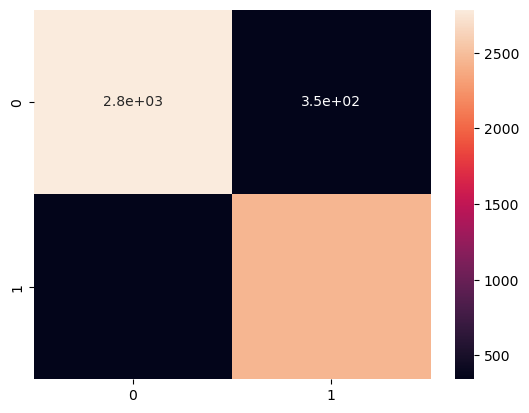

In [50]:
import seaborn as sns
sns.heatmap(results, annot= True)

#### Testing the Model

In [57]:
def test_image(ind, images_f, images_f_2, Model):
    # Display the image at the given index
    plt.imshow(images_f[ind])
    
    # Get the preprocessed image at the given index
    image_test = images_f_2[ind]
    
    # Make a prediction using the model
    Pred_l = Model.predict(np.array([image_test]))
    
    # Define a list for gender labels
    sex_f = ["Male", "Female"]
    
    # Get the predicted age by rounding the prediction
    age = int(np.round(Pred_l[1][0]))
    
    # Get the predicted gender by rounding the prediction
    sex = int(np.round(Pred_l[0][0]))
    
    # Print the predicted age
    print("Predicted Age is " + str(age))
    
    # Print the predicted gender
    print("Predicted Gender is " + sex_f[sex])




#### Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Age is 87
Predicted Gender is Female


C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_l[1][0]))
C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_l[0][0]))


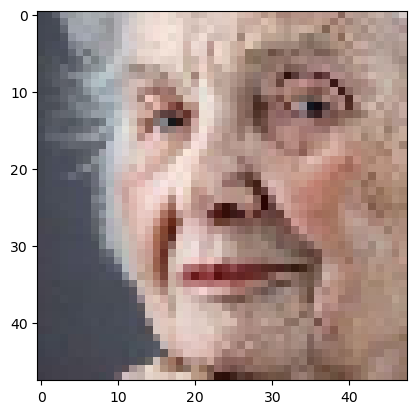

In [58]:
test_image(4, images_f,images_f_2, Model)   

#### Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Age is 11
Predicted Gender is Female


C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_l[1][0]))
C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_l[0][0]))


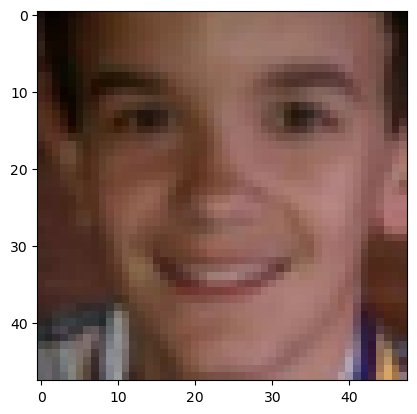

In [59]:
test_image(23, images_f,images_f_2, Model)   

#### Test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Age is 11
Predicted Gender is Female


C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_l[1][0]))
C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_l[0][0]))


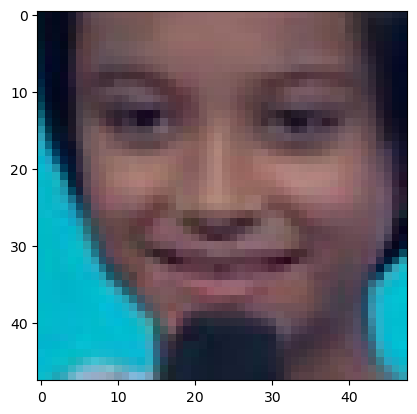

In [60]:
test_image(168, images_f,images_f_2, Model)   

#### Test 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Age is 33
Predicted Gender is Male


C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_l[1][0]))
C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_l[0][0]))


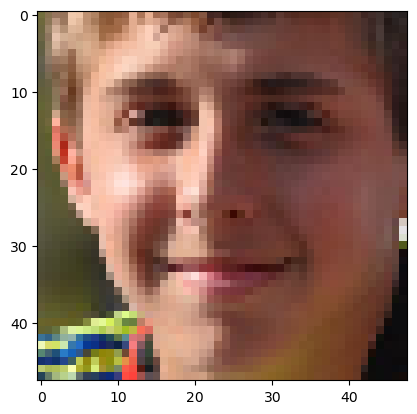

In [61]:
test_image(888, images_f,images_f_2, Model)   

#### Test 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Age is 23
Predicted Gender is Female


C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(Pred_l[1][0]))
C:\Users\bashu\AppData\Local\Temp\ipykernel_9448\3860706816.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(Pred_l[0][0]))


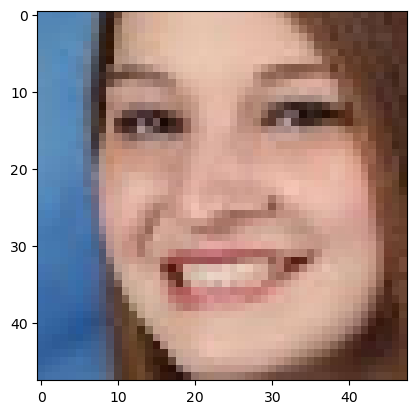

In [62]:
test_image(1288, images_f,images_f_2, Model)   